# K-Means

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

Text(0.5, 1.0, 'Data Points')

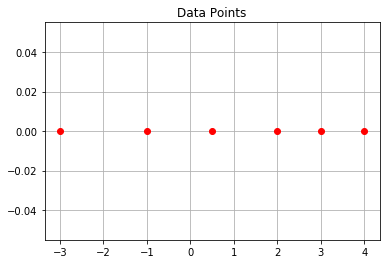

In [14]:
x = [np.array([-3.0]), np.array([-1.0]), np.array([0.5]), np.array([2.0]), np.array([3.0]), np.array([4.0])]
plt.plot([x_i[0] for x_i in x], [0 for _ in x], 'ro') 
plt.grid()
plt.title('Data Points')

In [29]:
# Use L2-Norm
def dis_l2(x0, x1):
    return np.linalg.norm(x0-x1)

def loss_J(X, r, mu, dis=dis_l2):
    loss = 0
    for i, x in enumerate(X):
        cluster_id = r[i]
        mu_x = mu[cluster_id-1]
        loss += float(dis(mu_x, x)**2)
    return loss

In [43]:
def do_k_means(x, K, mu=None):
    n_x = len(x)

    if mu is None:
        mu = [np.array([-1.0]), np.array([3.0])]
    r = [0.0 for _ in range(n_x)]

    iteration = 1
    is_converged = False
    while not is_converged:
        is_converged = True

        # Update the cluster assignments r for each data point x
        for i, x_i in enumerate(x):
            # find the closest cluster
            cluster_x = None
            min_r_dist = None
            # iterate through each miu
            for j, mu_j in enumerate(mu):
                cluster_id = j + 1
                dis2r = dis(x_i, mu_j)
                if min_r_dist is None or dis2r < min_r_dist:
                    min_r_dist = dis2r
                    cluster_x = cluster_id
            # assign x to cluster r_x
            if r[i] != cluster_x:
                r[i] = cluster_x
                is_converged = False
                
        print('Step %d, after updating cluster assignment but before updating centroids' % (iteration,))
        print('\tx: %s\n\tr: %s\n\t\u03bc: %s\n\tLoss J: %s' % (str(x), str(r), str(mu), str(loss_J(x, r, mu))))
            

        # update miu by computing the mean of each cluster
        for i in range(0, K):
            n_cluster_i = 0
            sum_cluster_i = 0
            cluster_id = i + 1

            for j, r_x in enumerate(r):
                if r_x == cluster_id:
                    sum_cluster_i += x[j]
                    n_cluster_i += 1

            mu[i] = sum_cluster_i/n_cluster_i

        print('After step ', iteration)
        print('\tx: %s\n\tr: %s\n\t\u03bc: %s\n\tLoss J: %s' % (str(x), str(r), str(mu), str(loss_J(x, r, mu))))
        iteration += 1
        
    print('\nConverged!')

In [44]:
K = 2
mu = [np.array([-1.0]), np.array([3.0])]
do_k_means(x, K, mu=mu)

Step 1, after updating cluster assignment but before updating centroids
	x: [array([-3.]), array([-1.]), array([0.5]), array([2.]), array([3.]), array([4.])]
	r: [1, 1, 1, 2, 2, 2]
	μ: [array([-1.]), array([3.])]
	Loss J: 8.25
After step  1
	x: [array([-3.]), array([-1.]), array([0.5]), array([2.]), array([3.]), array([4.])]
	r: [1, 1, 1, 2, 2, 2]
	μ: [array([-1.16666667]), array([3.])]
	Loss J: 8.166666666666666
Step 2, after updating cluster assignment but before updating centroids
	x: [array([-3.]), array([-1.]), array([0.5]), array([2.]), array([3.]), array([4.])]
	r: [1, 1, 1, 2, 2, 2]
	μ: [array([-1.16666667]), array([3.])]
	Loss J: 8.166666666666666
After step  2
	x: [array([-3.]), array([-1.]), array([0.5]), array([2.]), array([3.]), array([4.])]
	r: [1, 1, 1, 2, 2, 2]
	μ: [array([-1.16666667]), array([3.])]
	Loss J: 8.166666666666666

Converged!


In [45]:
K = 3
mu = [np.array([-3.0]), np.array([0]), np.array([3.0])]
do_k_means(x, K, mu=mu)

Step 1, after updating cluster assignment but before updating centroids
	x: [array([-3.]), array([-1.]), array([0.5]), array([2.]), array([3.]), array([4.])]
	r: [1, 2, 2, 3, 3, 3]
	μ: [array([-3.]), array([0]), array([3.])]
	Loss J: 3.25
After step  1
	x: [array([-3.]), array([-1.]), array([0.5]), array([2.]), array([3.]), array([4.])]
	r: [1, 2, 2, 3, 3, 3]
	μ: [array([-3.]), array([-0.25]), array([3.])]
	Loss J: 3.125
Step 2, after updating cluster assignment but before updating centroids
	x: [array([-3.]), array([-1.]), array([0.5]), array([2.]), array([3.]), array([4.])]
	r: [1, 2, 2, 3, 3, 3]
	μ: [array([-3.]), array([-0.25]), array([3.])]
	Loss J: 3.125
After step  2
	x: [array([-3.]), array([-1.]), array([0.5]), array([2.]), array([3.]), array([4.])]
	r: [1, 2, 2, 3, 3, 3]
	μ: [array([-3.]), array([-0.25]), array([3.])]
	Loss J: 3.125

Converged!
